In [411]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
layers = keras.layers

In [412]:

data = yf.download("INVE-B.ST", start="2010-12-10", end="2023-12-10", progress=False)
test_data = yf.download("INVE-B.ST", start="2023-12-10", end="2025-12-10", progress=False)
print(data.head())
print(test_data.head(11))


Price           Close       High        Low       Open    Volume
Ticker      INVE-B.ST  INVE-B.ST  INVE-B.ST  INVE-B.ST INVE-B.ST
Date                                                            
2010-12-10  23.496698  23.496698  23.347250  23.347250   5362008
2010-12-13  23.646152  23.712576  23.513311  23.529915   4596564
2010-12-14  23.828810  23.828810  23.529911  23.646149   8337956
2010-12-15  23.695969  23.845419  23.646152  23.745785   7939340
2010-12-16  23.695969  23.762392  23.646152  23.695969   5771608
Price            Close        High         Low        Open    Volume
Ticker       INVE-B.ST   INVE-B.ST   INVE-B.ST   INVE-B.ST INVE-B.ST
Date                                                                
2023-12-11  219.915726  219.915726  216.390512  216.921713   3538288
2023-12-12  220.929825  221.267865  219.481105  220.108878   3548097
2023-12-13  219.915726  222.185393  219.770860  220.929833   3816536
2023-12-14  221.992233  223.199500  220.833245  221.702486   46076

/var/folders/hy/9wpt6rl132ngrmdnqfbw_z040000gn/T/ipykernel_70325/1983472743.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("INVE-B.ST", start="2010-12-10", end="2023-12-10", progress=False)
/var/folders/hy/9wpt6rl132ngrmdnqfbw_z040000gn/T/ipykernel_70325/1983472743.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  test_data = yf.download("INVE-B.ST", start="2023-12-10", end="2025-12-10", progress=False)


In [413]:
data.index

DatetimeIndex(['2010-12-10', '2010-12-13', '2010-12-14', '2010-12-15',
               '2010-12-16', '2010-12-17', '2010-12-20', '2010-12-21',
               '2010-12-22', '2010-12-23',
               ...
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-04', '2023-12-05', '2023-12-06',
               '2023-12-07', '2023-12-08'],
              dtype='datetime64[ns]', name='Date', length=3268, freq=None)

(3268,)
[23.49669838 23.6461525  23.82880974 23.69596863 23.69596863]


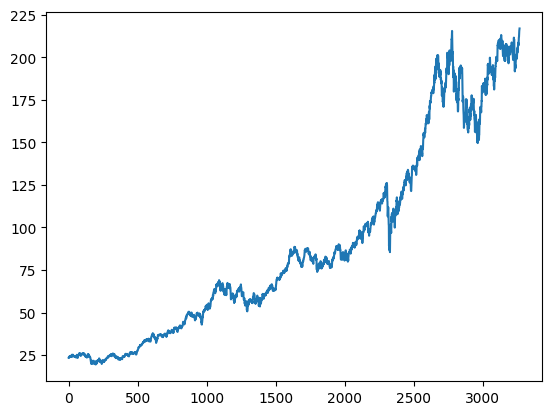

In [414]:
data_close = data['Close'].values
data_close = data_close.ravel()
print(data_close.shape)
print(data_close[:5])
plt.plot(data_close)
plt.show()


# Normalize

In [415]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(data_close.reshape(-1,1))

dataset_train_scaled.shape

(3268, 1)

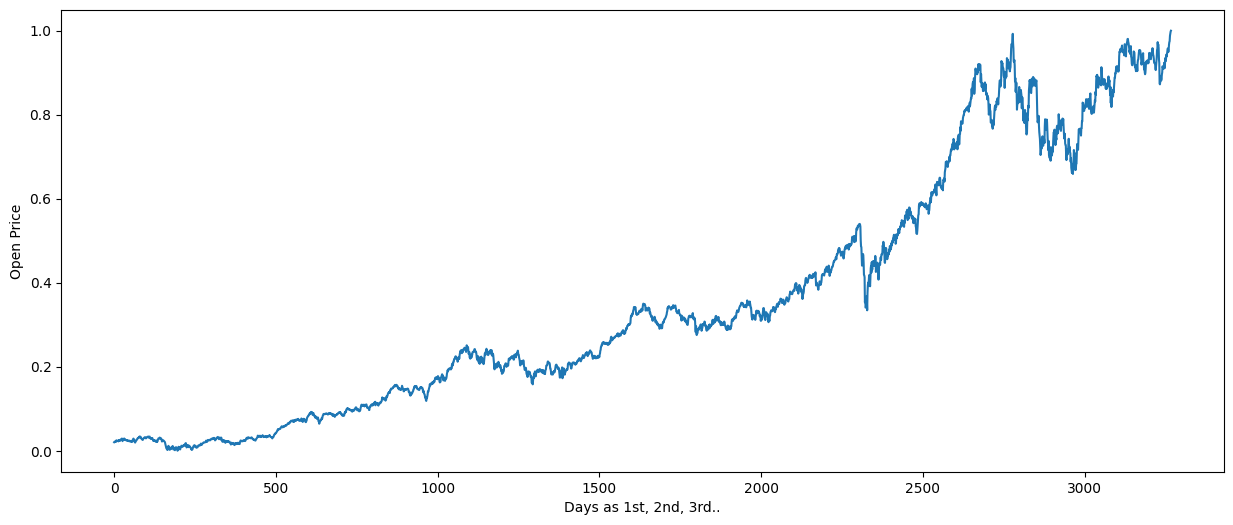

In [416]:

plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [417]:
X_train = []
y_train = []

length_train = dataset_train_scaled.shape[0]
window_size = 55

for i in range(window_size, length_train):
    X_train.append(dataset_train_scaled[i-window_size:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [418]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (3213, 55)
Shape of y_train before reshape : (3213,)


In [419]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (3213, 55, 1)
Shape of y_train after reshape : (3213, 1)


In [420]:
print(X_train[0])
print(y_train[0])

[[0.02021547]
 [0.02097252]
 [0.02189776]
 [0.02122486]
 [0.02122486]
 [0.02088842]
 [0.02156132]
 [0.02475765]
 [0.02358005]
 [0.02332772]
 [0.02324359]
 [0.02315947]
 [0.02349593]
 [0.02223423]
 [0.0252623 ]
 [0.02517819]
 [0.02341185]
 [0.0252623 ]
 [0.02358005]
 [0.02585112]
 [0.02652403]
 [0.02652403]
 [0.02719696]
 [0.0273652 ]
 [0.02904748]
 [0.02652403]
 [0.02282303]
 [0.02534646]
 [0.02601935]
 [0.02610347]
 [0.02761752]
 [0.02913159]
 [0.02786987]
 [0.02660818]
 [0.02660818]
 [0.02517819]
 [0.02610347]
 [0.0252623 ]
 [0.02543058]
 [0.02442117]
 [0.02458942]
 [0.02366416]
 [0.02450531]
 [0.02341185]
 [0.02273892]
 [0.02383242]
 [0.02324359]
 [0.02400062]
 [0.02273892]
 [0.02257071]
 [0.02156132]
 [0.02172955]
 [0.0221501 ]
 [0.02374829]
 [0.02240246]]
[0.02088842]


In [421]:
z0 = layers.Input(shape=[None, 1])
z = layers.LSTM(64, return_sequences=True)(z0)
z = layers.Dropout(0.2)(z)
z = layers.LSTM(64, return_sequences=True)(z)
z = layers.Dropout(0.2)(z)
z = layers.LSTM(64, return_sequences=True)(z)
z = layers.Dropout(0.2)(z)
z = layers.LSTM(64)(z)
z = layers.Dense(1)(z)
model = keras.models.Model(inputs=z0, outputs=z)
print(model.summary())



Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, None, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, None, 64)       │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, None, 64)       │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, None, 64)       │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [422]:
adam = keras.optimizers.Adam(learning_rate=1e-3) # Start witha very large learning rate, since the loss is extremely high early
model.compile(loss='mse', optimizer=adam)

results = model.fit(X_train, y_train,
    epochs=400,
    batch_size=32,
    verbose=2,
    validation_split=0.1,
    callbacks=[        
        keras.callbacks.ModelCheckpoint(
            "best_model.keras", save_best_only=True, monitor="val_loss", mode="min", verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=4, verbose=1, min_lr=1E-5),
        keras.callbacks.EarlyStopping(patience=8, verbose=1)])

Epoch 1/400

Epoch 1: val_loss improved from None to 0.00350, saving model to best_model.keras
91/91 - 5s - 52ms/step - loss: 0.0071 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 2/400

Epoch 2: val_loss improved from 0.00350 to 0.00208, saving model to best_model.keras
91/91 - 2s - 23ms/step - loss: 8.2933e-04 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 3/400

Epoch 3: val_loss improved from 0.00208 to 0.00123, saving model to best_model.keras
91/91 - 2s - 23ms/step - loss: 8.4074e-04 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 4/400

Epoch 4: val_loss did not improve from 0.00123
91/91 - 2s - 23ms/step - loss: 7.8707e-04 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 5/400

Epoch 5: val_loss improved from 0.00123 to 0.00117, saving model to best_model.keras
91/91 - 2s - 23ms/step - loss: 8.7822e-04 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 6/400

Epoch 6: val_loss did not improve from 0.00117
91/91 - 2s - 23ms/step - loss: 7.1765e-04 - val_loss: 0.0016 - learnin

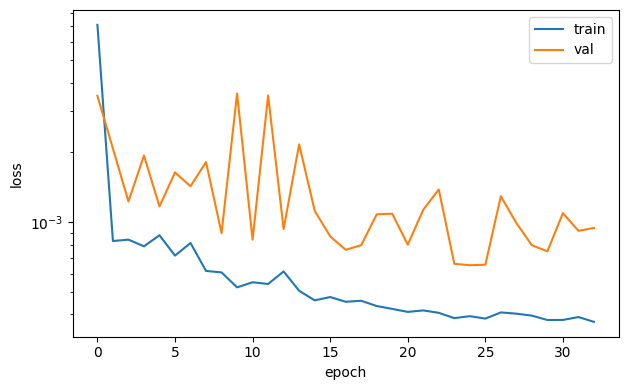

In [423]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()

In [424]:
results.history["loss"]

[0.00708934897556901,
 0.0008293321589007974,
 0.0008407397544942796,
 0.0007870725821703672,
 0.0008782159420661628,
 0.0007176504004746675,
 0.0008129996713250875,
 0.0006162993959151208,
 0.0006072982796467841,
 0.0005235497374087572,
 0.0005505867884494364,
 0.0005413590115495026,
 0.0006131310947239399,
 0.0005062443087808788,
 0.000460239767562598,
 0.0004755237605422735,
 0.00045374836190603673,
 0.0004582942056003958,
 0.0004349354130681604,
 0.0004228223115205765,
 0.0004103346145711839,
 0.0004164577112533152,
 0.00040650751907378435,
 0.0003857732517644763,
 0.00039329074206762016,
 0.00038398915785364807,
 0.00040821373113431036,
 0.00040320001426152885,
 0.00039544422179460526,
 0.00037853704998269677,
 0.0003789169422816485,
 0.00038987890002317727,
 0.0003716744831763208]

In [425]:
model.load_weights("best_model.keras")
y_pred = model.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


(3213, 1)

In [426]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(3213, 1)

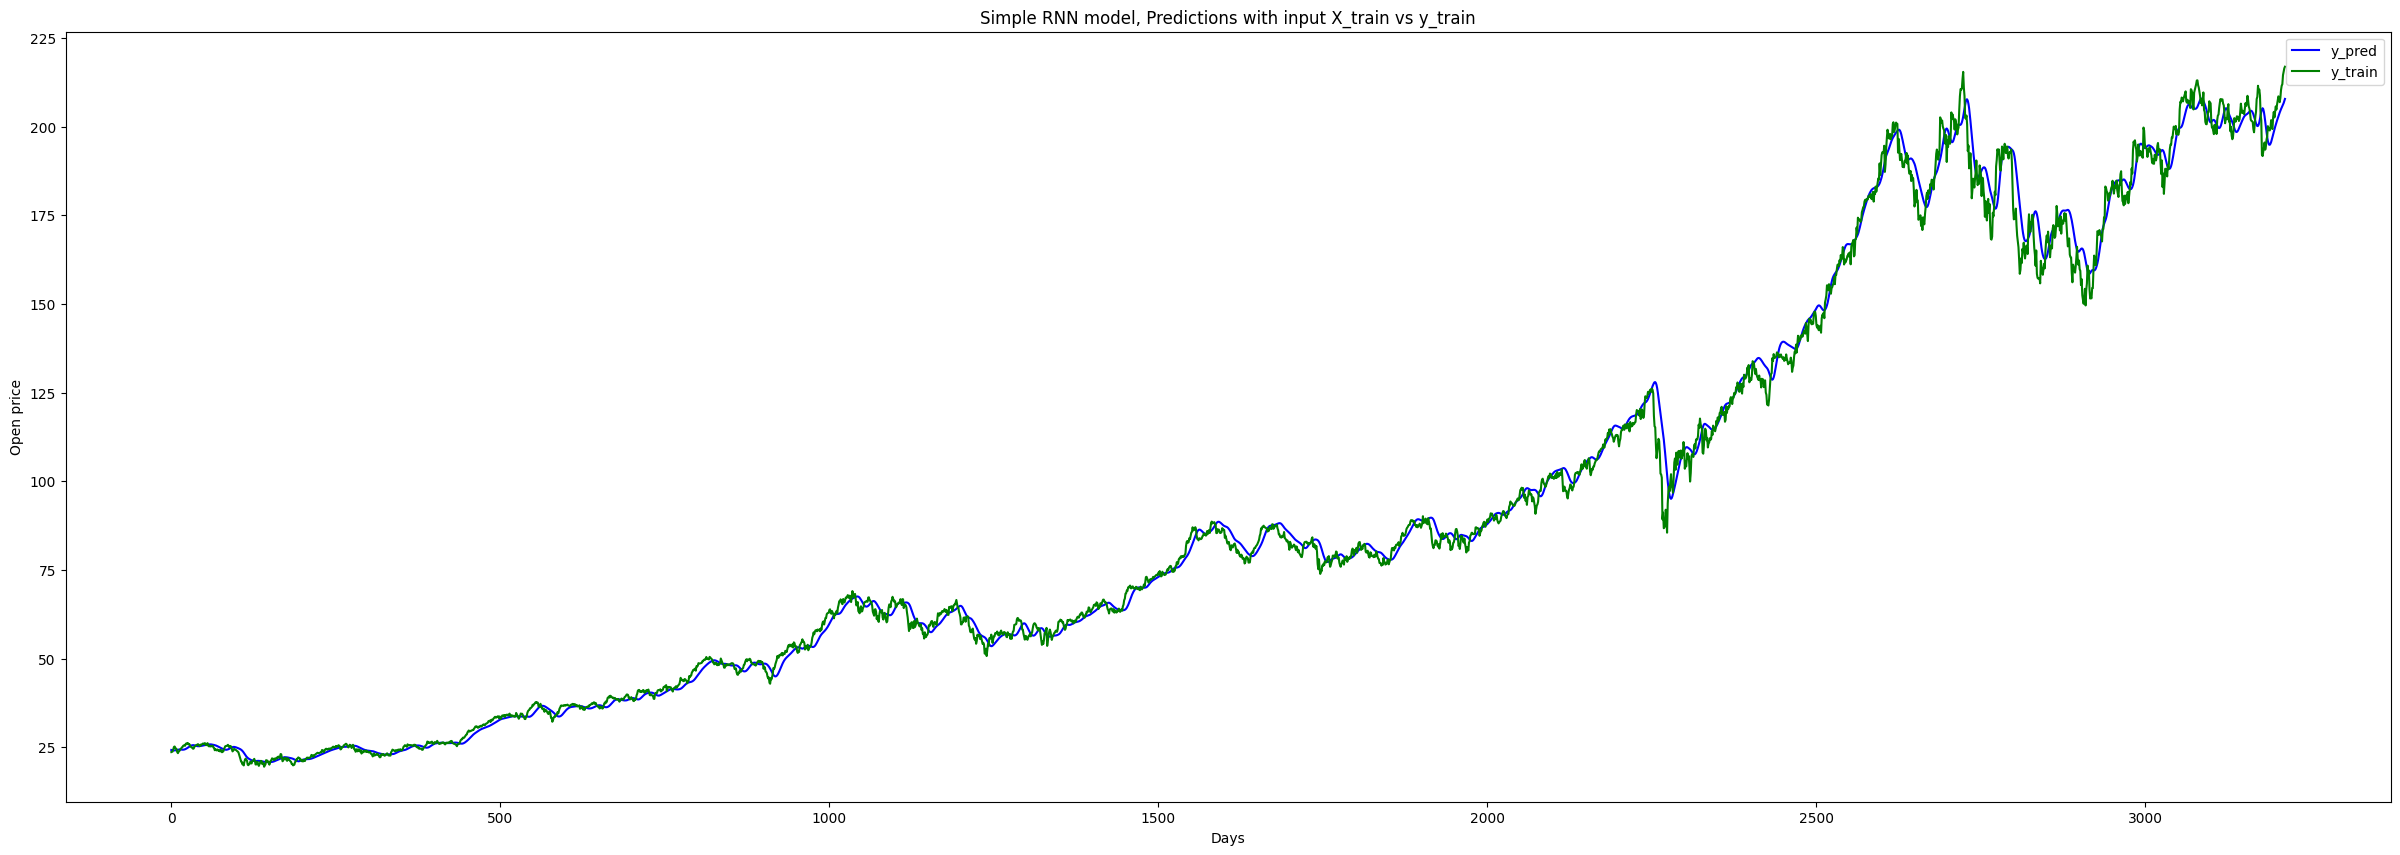

In [427]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

# Test data

(501,)
[219.91572571 220.92982483 219.91572571 221.99223328 223.39266968]


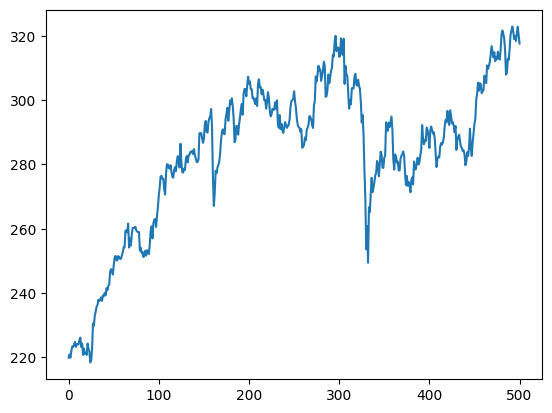

In [428]:
data_test = test_data['Close'].values
data_test = data_test.ravel()
print(data_test.shape)
print(data_test[:5])
plt.plot(data_test)
plt.show()

# Normalize test data

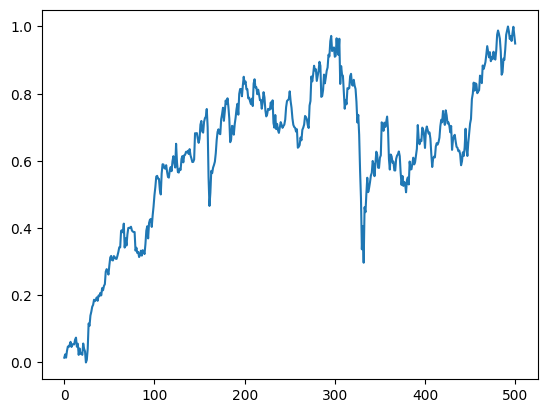

In [429]:
# normalize test data
scaled_dataset_test = scaler.fit_transform(data_test.reshape(-1,1))
plt.plot(scaled_dataset_test)
plt.show()

In [430]:
X_test = []
y_test = []
length_test = scaled_dataset_test.shape[0]

for i in range(window_size, length_test):
    X_test.append(scaled_dataset_test[i-window_size:i,0])
    y_test.append(scaled_dataset_test[i,0])

In [431]:
X_test, y_test = np.array(X_test), np.array(y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (446, 55)
Shape of y_test before reshape : (446,)


In [432]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (446, 55, 1)
Shape of y_test after reshape : (446, 1)


In [433]:
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


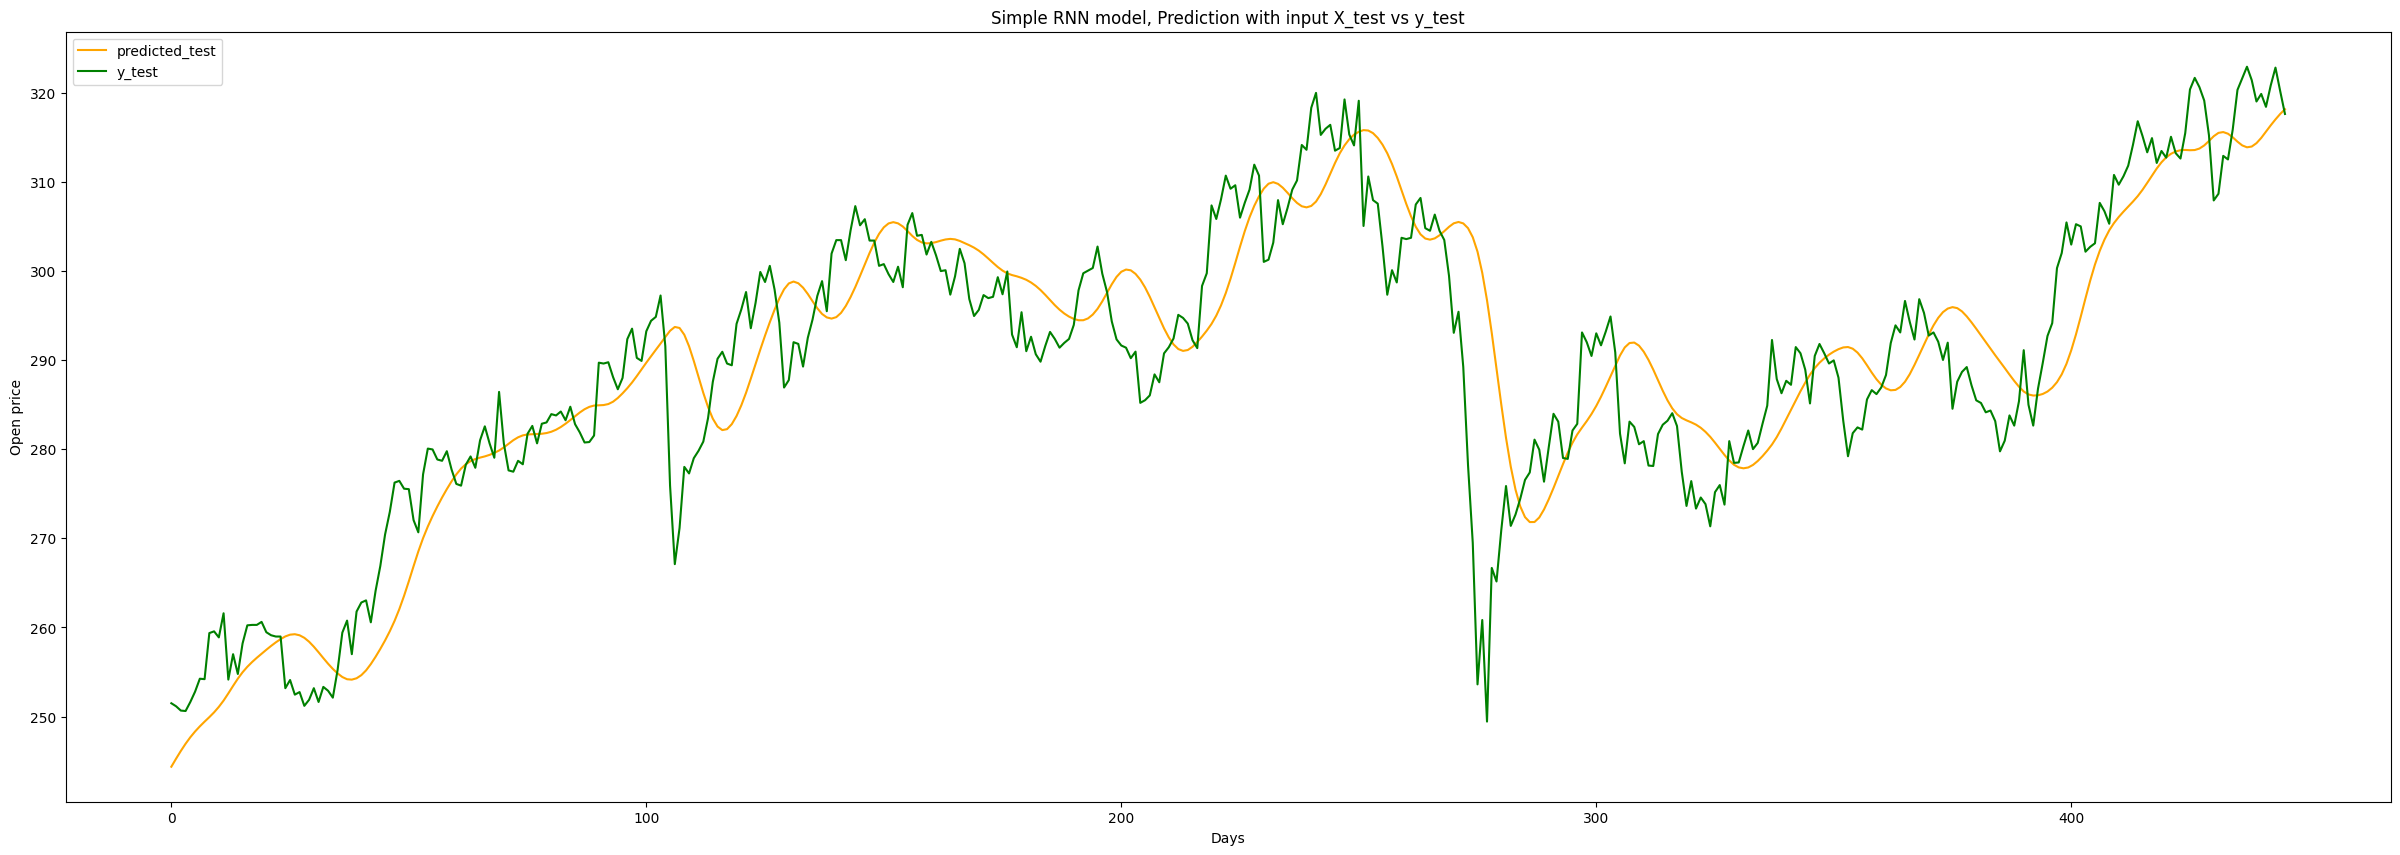

In [434]:
plt.figure(figsize = (30,10))
plt.plot(predicted_test, label = "predicted_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

# Combined test and train visualization

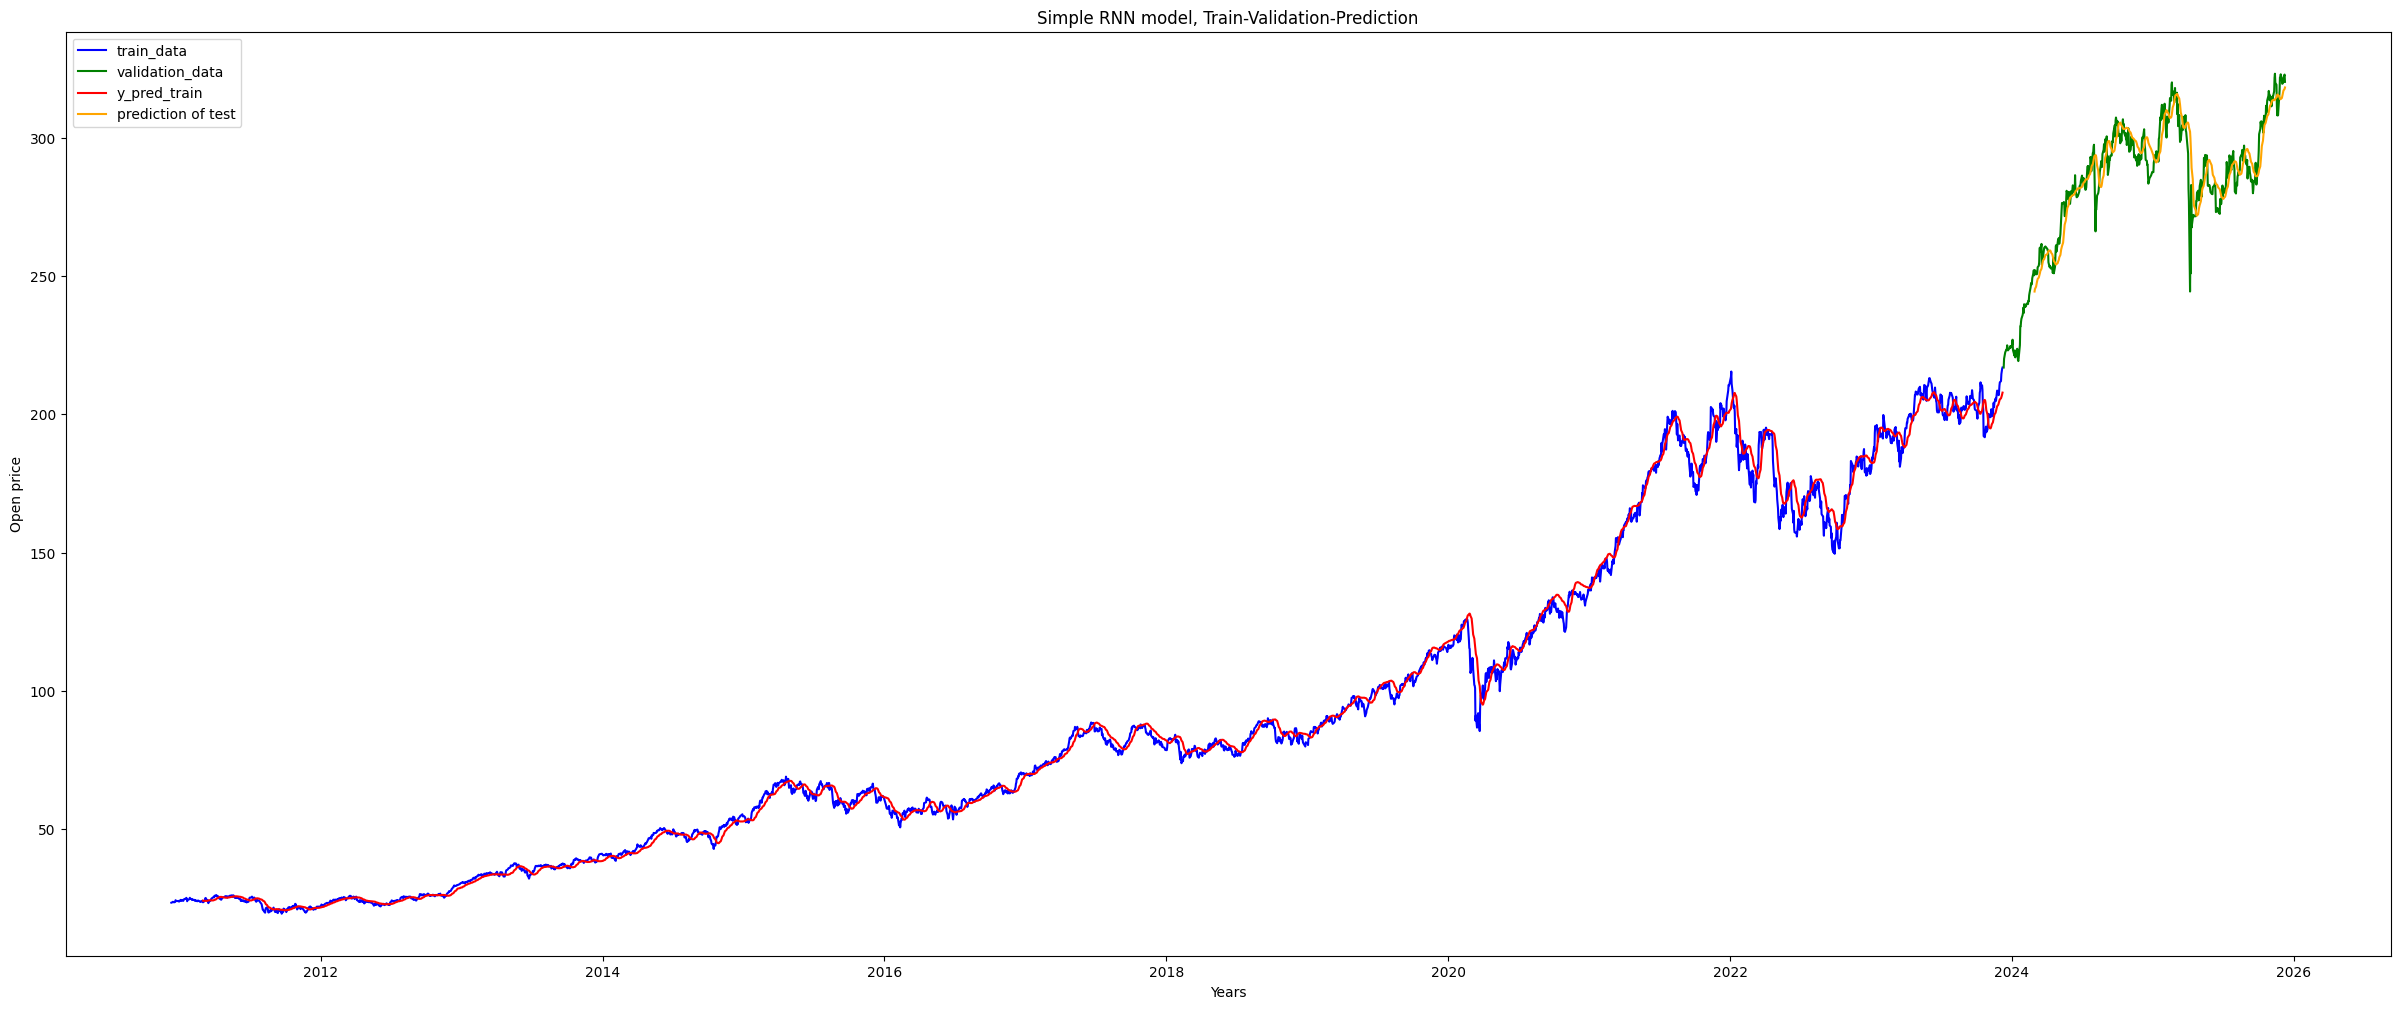

In [435]:
plt.subplots(figsize =(30,12))
plt.plot(data.index, data["Close"], label = "train_data", color = "b")
plt.plot(test_data.index, test_data["Open"], label = "validation_data", color = "g")
plt.plot(data.index[window_size:], y_pred, label = "y_pred_train", color = "r")
plt.plot(test_data.index[window_size:], predicted_test, label = "prediction of test", color = "orange")
plt.xlabel("Years")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

# Predict if higher or lower than the day before

In [445]:
# Percentage of days with higher values than the day before
print(data_close)
acc_list_train = []
for i, price in enumerate(data_close[1:]):
    if price > data_close[i]:
        acc_list_train.append(1)
    else:
        acc_list_train.append(0)

acc = np.mean(acc_list_train)
print("Percentage of days with higher close price than the day before: ",acc *100)



[ 23.49669838  23.6461525   23.82880974 ... 215.56956482 216.48707581
 216.92170715]
Percentage of days with higher close price than the day before:  52.096724823997555


In [436]:
# Percentage of days with higher values than the day before
# print(data_test)
acc_list = []
for i, price in enumerate(data_test[1:]):
    # print(price, data_test[i])
    if price > data_test[i]:
        acc_list.append(1)
    else:
        acc_list.append(0)

positive_days = acc_list.count(1)
acc = (positive_days/(len(data_test)-1))
print("Percentage of days with higher close price than the day before: ",acc *100)



Percentage of days with higher close price than the day before:  54.2


In [437]:
y_test = scaler.inverse_transform(y_test)
for i in range(10):
    print(predicted_test[i], y_test[i])

[244.37866] [251.49783325]
[245.28157] [251.15977478]
[246.14877] [250.67689514]
[246.95692] [250.62860107]
[247.68616] [251.6427002]
[248.33199] [252.80168152]
[248.90639] [254.25038147]
[249.43542] [254.20211792]
[249.94109] [259.36917114]
[250.47871] [259.56234741]


In [438]:
# Predicted data accuracy on higher or lowe than the day before
acc_predicted_list = []
p_test = predicted_test.ravel()
# d_test = data_test[window_size:]
for i, _ in enumerate(p_test[1:]):
    print(p_test[i], p_test[i-1])
    if p_test[i] > y_test[i-1]:
        acc_predicted_list.append(1)
    else:
        acc_predicted_list.append(0)

positive_days_predicted = acc_predicted_list.count(1)
acc_predicted = (positive_days_predicted/(len(y_test)-1))
print("Percentage of days with higher close price than the day before: ",acc_predicted *100)

244.37866 318.13428
245.28157 244.37866
246.14877 245.28157
246.95692 246.14877
247.68616 246.95692
248.33199 247.68616
248.90639 248.33199
249.43542 248.90639
249.94109 249.43542
250.47871 249.94109
251.09323 250.47871
251.79845 251.09323
252.60596 251.79845
253.44472 252.60596
254.25545 253.44472
254.97528 254.25545
255.58896 254.97528
256.12064 255.58896
256.60086 256.12064
257.05438 256.60086
257.49783 257.05438
257.9278 257.49783
258.3301 257.9278
258.68973 258.3301
258.99533 258.68973
259.1918 258.99533
259.24252 259.1918
259.1236 259.24252
258.83853 259.1236
258.40073 258.83853
257.84247 258.40073
257.21667 257.84247
256.56424 257.21667
255.93185 256.56424
255.35428 255.93185
254.84772 255.35428
254.44167 254.84772
254.19162 254.44167
254.14821 254.19162
254.30078 254.14821
254.64888 254.30078
255.18661 254.64888
255.89294 255.18661
256.70807 255.89294
257.5947 256.70807
258.5447 257.5947
259.58115 258.5447
260.73837 259.58115
262.05798 260.73837
263.55008 262.05798
265.17764 26

In [439]:
print(len(acc_list), len(acc_predicted_list))

500 445


In [440]:
accuracy = []
for i in range(len(acc_predicted_list)):
    if  acc_list[i+window_size] ==  acc_predicted_list[i]:
        accuracy.append(1)
    else:
        accuracy.append(0)
    
print("Direction accuracy:", sum(accuracy)/len(accuracy)*100)

Direction accuracy: 53.48314606741573


In [441]:
for i in range(len(acc_predicted_list)):
    print(acc_list[i+window_size],acc_predicted_list[i])

0 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
1 1
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
1 1
0 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
1 1
1 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 1
1 1
0 1
1 0
1 1
0 0
0 0
1 0
0 1
0 0
0 0
1 1
0 1
1 1
1 1
0 0
1 0
1 1
1 0
0 0
1 0
0 0
1 0
0 1
0 0
0 1
1 1
1 1
1 1
0 1
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
0 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
1 1
0 1
0 1
1 1
0 1
1 1
1 1
0 0
1 0
0 0
1 0
0 1
0 0
1 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
0 1
0 0
1 1
0 1
1 1
0 1
0 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 0
1 1
1 0
0 0
1 0
1 0
0 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
1 1
1 1
0 1
1 1
1 1
1 1
1 0
0 0
1 0
1 0
0 0
1 0
1 0
0 0
1 0
1 0
0 1
0 0
1 0


In [442]:
true_up = (y_test[1:] > y_test[:-1]).astype(int)
pred_up = (predicted_test[1:] > y_test[:-1]).astype(int)

correct = (true_up == pred_up).astype(int)
accuracy = correct.mean()
print("Direction accuracy:", accuracy)
print(f"Percentage of days that went up {true_up.mean()*100:.2f}%")


Direction accuracy: 0.5258426966292135
Percentage of days that went up 53.26%


In [443]:
# Predict tommorow's closing price
last_w_days = scaled_dataset_test[window_size:]
print(scaler.inverse_transform(last_w_days))
predicted_tomorrow = model.predict(last_w_days.reshape(1,-1,1))
predicted_tomorrow = scaler.inverse_transform(predicted_tomorrow)
print("Predicted tommorow's closing price: ", predicted_tomorrow[0][0])

[[251.49783325]
 [251.15977478]
 [250.67689514]
 [250.62860107]
 [251.6427002 ]
 [252.80168152]
 [254.25038147]
 [254.20211792]
 [259.36917114]
 [259.56234741]
 [258.8862915 ]
 [261.59054565]
 [254.15379333]
 [257.00292969]
 [254.78155518]
 [258.21026611]
 [260.23846436]
 [260.28674316]
 [260.28674316]
 [260.62478638]
 [259.46578979]
 [259.12774658]
 [258.98287964]
 [258.98287964]
 [253.18797302]
 [254.10554504]
 [252.46362305]
 [252.75338745]
 [251.20809937]
 [251.88415527]
 [253.18797302]
 [251.6427002 ]
 [253.33285522]
 [252.89826965]
 [252.12559509]
 [255.21621704]
 [259.41751099]
 [260.7696228 ]
 [257.00292969]
 [261.78375244]
 [262.79788208]
 [263.03927612]
 [260.57647705]
 [264.10171509]
 [266.90258789]
 [270.42779541]
 [272.97161865]
 [276.24923706]
 [276.44485474]
 [275.56433105]
 [275.51541138]
 [272.04211426]
 [270.67236328]
 [277.17868042]
 [280.06494141]
 [279.96710205]
 [278.84194946]
 [278.69522095]
 [279.77142334]
 [277.71679688]
 [276.10247803]
 [275.9067688 ]
 [278.25